In [729]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [730]:
df1 = pd.read_csv('C://Users//user//Desktop//major_project//keystroke-dynamics-datagen-master//Keystroke-Dynamics-Using-LSTMs-master//Keystroke-Dynamics-Using-LSTMs-master/shiva_appended.csv')
df2= pd.read_csv('C://Users//user//Desktop//major_project//keystroke-dynamics-datagen-master//Keystroke-Dynamics-Using-LSTMs-master//Keystroke-Dynamics-Using-LSTMs-master/shiva_fraud_appended.csv')

In [731]:
df1.shape

(1000, 32)

In [732]:
df2.shape

(400, 32)

In [733]:
df1['output']=1
df1.columns.get_loc("Time_from_lastcheckin")
#df1.columns

17

In [734]:
df1
df1=pd.concat([df1.iloc[:,1:19],df1.iloc[:,-1:]],axis = 1)

In [735]:
df2['output']=0

In [736]:
df2
df2=pd.concat([df2.iloc[:,1:19],df2.iloc[:,-1:]],axis = 1)

In [737]:
df_train=pd.concat([df1, df2], axis=0)

In [738]:
df_train

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,Time_from_lastcheckin,Distance_from_lastcheckin,output
0,0.149134,0.095284,0.244418,0.078049,0.186720,0.264769,0.111879,0.155903,0.267782,0.084427,0.195561,0.279988,0.156013,0.451429,0.607442,0.064604,1.000000,0,1
1,0.120761,0.070547,0.191308,0.088534,0.160494,0.249028,0.094145,0.191520,0.285665,0.082136,0.234294,0.316430,0.163127,0.579766,0.742893,0.069873,1.000000,358,1
2,0.140864,0.054410,0.195274,0.076005,0.156120,0.232125,0.090494,0.174344,0.264838,0.069168,0.245148,0.314316,0.144888,0.386679,0.531567,0.063932,1.000000,813,1
3,0.129242,0.105580,0.234822,0.078046,0.166502,0.244548,0.114891,0.166035,0.280926,0.074961,0.238599,0.313560,0.161720,0.350051,0.511771,0.070385,1.000000,13462,1
4,0.118013,0.092016,0.210029,0.061421,0.192829,0.254250,0.101509,0.200519,0.302028,0.068533,0.249747,0.318280,0.147686,0.670814,0.818500,0.047890,1.000000,14282,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.154248,0.128296,0.282544,0.090151,0.137850,0.228001,0.092422,0.233860,0.326282,0.068830,0.410862,0.479692,0.135077,1.116141,1.251218,0.020980,1.000002,14282,0
396,0.115292,0.207154,0.322446,0.063008,0.302537,0.365545,0.081431,0.340915,0.422346,0.070006,0.286656,0.356662,0.148717,0.795881,0.944598,0.057252,0.041667,2190,0
397,0.161652,0.187839,0.349491,0.071358,0.302354,0.373712,0.082195,0.335884,0.418079,0.069844,0.407137,0.476981,0.145560,0.775331,0.920891,0.017204,1.000001,0,0
398,0.113651,0.260368,0.374019,0.058543,1.161646,1.220189,0.062964,0.363273,0.426237,0.059677,0.262170,0.321847,0.151061,0.908048,1.059109,0.076505,0.041667,1415,0


In [739]:
from sklearn.utils import shuffle
df = shuffle(df_train)
df

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,Time_from_lastcheckin,Distance_from_lastcheckin,output
625,0.142900,0.085645,0.228545,0.078339,0.178919,0.257258,0.084738,0.171543,0.256281,0.067939,0.271840,0.339779,0.162704,0.417444,0.580148,0.104421,0.041667,658,1
328,0.172903,0.253214,0.426117,0.087613,0.270166,0.357779,0.065551,0.359481,0.425032,0.085704,0.384540,0.470244,0.153334,0.873772,1.027106,0.097621,0.041667,10150,0
266,0.152559,0.103573,0.256132,0.073079,0.173675,0.246754,0.094507,0.178855,0.273362,0.065679,0.232688,0.298367,0.146818,0.362313,0.509131,0.080756,1.000002,13679,1
56,0.157962,0.233701,0.391663,0.064848,0.250140,0.314988,0.066328,0.339464,0.405792,0.050636,0.327822,0.378458,0.132974,0.944590,1.077564,0.101943,0.041667,2210,0
265,0.153799,0.366636,0.520435,0.077743,0.695374,0.773117,0.077838,0.625723,0.703561,0.078785,0.591027,0.669812,0.151645,0.991426,1.143071,0.017803,1.000000,704,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898,0.151715,0.095035,0.246750,0.078456,0.219079,0.297535,0.091544,0.189296,0.280840,0.060362,0.313667,0.374029,0.168163,0.335309,0.503472,0.060281,1.000002,9563,1
307,0.128820,0.134053,0.262873,0.100101,0.196931,0.297032,0.102865,0.183128,0.285993,0.067863,0.253567,0.321430,0.153089,0.600377,0.753466,0.058390,1.000002,13613,1
237,0.145521,0.089175,0.234696,0.071262,0.177430,0.248692,0.094635,0.178830,0.273465,0.093265,0.227578,0.320843,0.151844,0.635370,0.787214,0.062361,1.000002,15248,1
191,0.147514,0.100547,0.248061,0.149709,0.062831,0.212540,0.104066,0.191092,0.295158,0.087181,0.124359,0.211540,0.146236,0.757713,0.903949,0.074462,1.000001,0,0


In [740]:
array = df.values
X = array[:,0:15]
Y = array[:,-1]

In [741]:
Y.shape

(1400,)

In [742]:
# Load libraries
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [743]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [744]:
X_train.shape

(1120, 15)

In [745]:
Y_train.shape

(1120,)

In [746]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

No Skill: ROC AUC=0.500
MLP: ROC AUC=1.000


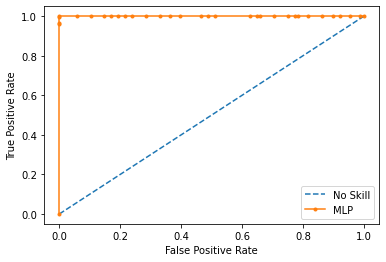

TPR- 1.0
FPR- 0.0
0.0


In [747]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(10), random_state=1)
model=clf
model.fit(X_train,Y_train)
# predict probabilities
ns_probs = [0 for _ in range(len(Y_validation))]
lr_probs = model.predict_proba(X_validation)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_validation, ns_probs)
lr_auc = roc_auc_score(Y_validation, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('MLP: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_validation, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_validation, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='MLP')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
from sklearn.metrics import confusion_matrix
Y_pred=model.predict(X_validation)
a=confusion_matrix(Y_validation, Y_pred)
FP = a[1][0]
FN = a[0][1]
TP = a[0][0]
TN = a[1][1]
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
print("TPR-",TPR)
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
print("FPR-",FPR)
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

FAR=FPR
FRR=FNR
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
ten=(FAR+FRR)/2
print(ten)

No Skill: ROC AUC=0.500
MLP: ROC AUC=1.000


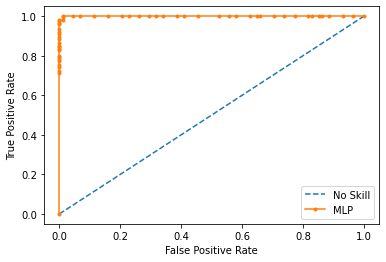

TPR- 0.9886363636363636
FPR- 0.0
0.005681818181818182


In [748]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(50), random_state=1)
model=clf
model.fit(X_train,Y_train)
# predict probabilities
ns_probs = [0 for _ in range(len(Y_validation))]
lr_probs = model.predict_proba(X_validation)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_validation, ns_probs)
lr_auc = roc_auc_score(Y_validation, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('MLP: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_validation, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_validation, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='MLP')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
from sklearn.metrics import confusion_matrix
Y_pred=model.predict(X_validation)
a=confusion_matrix(Y_validation, Y_pred)
FP = a[1][0]
FN = a[0][1]
TP = a[0][0]
TN = a[1][1]
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
print("TPR-",TPR)
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
print("FPR-",FPR)
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

FAR=FPR
FRR=FNR
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
fifty=(FAR+FRR)/2
print(fifty)

No Skill: ROC AUC=0.500
MLP: ROC AUC=1.000


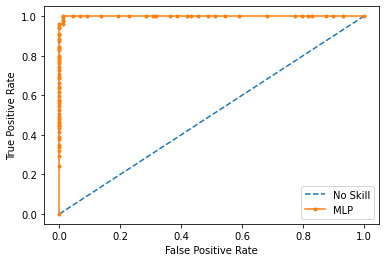

ImportError: cannot import name 'confusion_matri'

In [749]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(100), random_state=1)
model=clf
model.fit(X_train,Y_train)
# predict probabilities
ns_probs = [0 for _ in range(len(Y_validation))]
lr_probs = model.predict_proba(X_validation)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_validation, ns_probs)
lr_auc = roc_auc_score(Y_validation, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('MLP: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_validation, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_validation, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='MLP')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
from sklearn.metrics import confusion_matri
Y_pred=model.predict(X_validation)
a=confusion_matrix(Y_validation, Y_pred)
FP = a[1][0]
FN = a[0][1]
TP = a[0][0]
TN = a[1][1]
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
print("TPR-",TPR)
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
print("FPR-",FPR)
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

FAR=FPR
FRR=FNR
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
hundred=(FAR+FRR)/2
print(hundred)

In [ ]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(200), random_state=1)
model=clf
model.fit(X_train,Y_train)
# predict probabilities
ns_probs = [0 for _ in range(len(Y_validation))]
lr_probs = model.predict_proba(X_validation)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_validation, ns_probs)
lr_auc = roc_auc_score(Y_validation, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('MLP: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_validation, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_validation, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='MLP')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
from sklearn.metrics import confusion_matrix
Y_pred=model.predict(X_validation)
a=confusion_matrix(Y_validation, Y_pred)
FP = a[1][0]
FN = a[0][1]
TP = a[0][0]
TN = a[1][1]
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
print("TPR-",TPR)
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
print("FPR-",FPR)
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

FAR=FPR
FRR=FNR
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
two_hundred=(FAR+FRR)/2
print(two_hundred)

In [ ]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(300), random_state=1)
model=clf
model.fit(X_train,Y_train)
# predict probabilities
ns_probs = [0 for _ in range(len(Y_validation))]
lr_probs = model.predict_proba(X_validation)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_validation, ns_probs)
lr_auc = roc_auc_score(Y_validation, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('MLP: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_validation, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_validation, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='MLP')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
from sklearn.metrics import confusion_matrix
Y_pred=model.predict(X_validation)
a=confusion_matrix(Y_validation, Y_pred)
FP = a[1][0]
FN = a[0][1]
TP = a[0][0]
TN = a[1][1]
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
print("TPR-",TPR)
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
print("FPR-",FPR)
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

FAR=FPR
FRR=FNR
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
three_hundred=(FAR+FRR)/2
print(three_hundred)

In [750]:
Neurons=['10','50','100','200','300']
FAR_FRR_average=[ten,fifty,hundred,two_hundred,three_hundred]

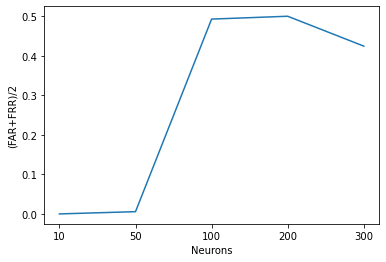

In [751]:
import matplotlib.pyplot as plt
plt.plot(Neurons,FAR_FRR_average)
plt.xlabel('Neurons')
plt.ylabel('(FAR+FRR)/2')
plt.show()

In [752]:
df1 = pd.read_csv('C://Users//user//Desktop//major_project//keystroke-dynamics-datagen-master//Keystroke-Dynamics-Using-LSTMs-master//Keystroke-Dynamics-Using-LSTMs-master/shiva_appended.csv')
df2= pd.read_csv('C://Users//user//Desktop//major_project//keystroke-dynamics-datagen-master//Keystroke-Dynamics-Using-LSTMs-master//Keystroke-Dynamics-Using-LSTMs-master/shiva_fraud_appended.csv')

In [753]:
df1.shape

(1000, 32)

In [754]:
df2.shape

(400, 32)

In [755]:
df1['output']=1
df1.columns

Index(['Name', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm',
       'n', 'o', 'p', 'Time_from_lastcheckin', 'Distance_from_lastcheckin',
       'Result', 'Place', 'Last_Checkin_time', 'Current_checkin_time',
       'Previous_latitude', 'Previous_longitude', 'Previous_latitude.1',
       'Present_longitude', 'pressure_s', 'pressure_h', 'pressure_i',
       'pressure_v', 'pressure_a', 'output'],
      dtype='object')

In [756]:
df1.columns.get_loc("Time_from_lastcheckin")

17

In [757]:
df1
df1=pd.concat([df1.iloc[:,17:19],df1.iloc[:,27:]],axis = 1)

In [758]:
df1

,Time_from_lastcheckin,Distance_from_lastcheckin,pressure_s,pressure_h,pressure_i,pressure_v,pressure_a,output
0,1.000000,0,801.0,796.0,368,690,798.0,1
1,1.000000,358,939.0,719.0,928,831,409.0,1
2,1.000000,813,899.0,353.0,956,907,624.0,1
3,1.000000,13462,913.0,593.0,886,931,934.0,1
4,1.000000,14282,949.0,603.0,905,925,911.0,1
...,...,...,...,...,...,...,...,...
995,0.041667,3010,886.0,573.0,922,902,790.0,1
996,1.000001,1578,961.0,782.0,928,960,850.0,1
997,1.000000,13462,954.0,784.0,862,894,960.0,1
998,1.000001,13679,888.0,682.0,944,804,885.0,1


In [759]:
df2['output']=0
df2=pd.concat([df2.iloc[:,17:19],df2.iloc[:,27:]],axis = 1)

In [760]:
df2

,Time_from_lastcheckin,Distance_from_lastcheckin,pressure_s,pressure_h,pressure_i,pressure_v,pressure_a,output
0,1.000000,0,886.0,813.0,899.0,101.0,815.0,0
1,1.000000,358,966.0,698.0,897.5,225.0,351.0,0
2,1.000000,813,694.0,748.0,661.0,446.0,620.0,0
3,1.000000,13462,895.0,942.0,877.0,421.0,865.0,0
4,1.000000,14282,491.0,493.0,922.0,425.0,641.0,0
...,...,...,...,...,...,...,...,...
395,1.000002,14282,829.0,860.0,888.0,536.0,790.0,0
396,0.041667,2190,731.0,471.0,183.0,759.0,670.0,0
397,1.000001,0,394.5,805.0,615.0,101.0,371.0,0
398,0.041667,1415,408.5,831.0,897.0,732.0,631.0,0


In [761]:
df_train=pd.concat([df1, df2], axis=0)

In [762]:
df_train

,Time_from_lastcheckin,Distance_from_lastcheckin,pressure_s,pressure_h,pressure_i,pressure_v,pressure_a,output
0,1.000000,0,801.0,796.0,368.0,690.0,798.0,1
1,1.000000,358,939.0,719.0,928.0,831.0,409.0,1
2,1.000000,813,899.0,353.0,956.0,907.0,624.0,1
3,1.000000,13462,913.0,593.0,886.0,931.0,934.0,1
4,1.000000,14282,949.0,603.0,905.0,925.0,911.0,1
...,...,...,...,...,...,...,...,...
395,1.000002,14282,829.0,860.0,888.0,536.0,790.0,0
396,0.041667,2190,731.0,471.0,183.0,759.0,670.0,0
397,1.000001,0,394.5,805.0,615.0,101.0,371.0,0
398,0.041667,1415,408.5,831.0,897.0,732.0,631.0,0


In [763]:
from sklearn.utils import shuffle
df = shuffle(df_train)
df

,Time_from_lastcheckin,Distance_from_lastcheckin,pressure_s,pressure_h,pressure_i,pressure_v,pressure_a,output
563,0.041667,808,944.0,636.0,780.0,749.0,920.0,1
727,0.041667,892,891.0,524.0,771.0,854.0,462.0,1
355,0.041667,2197,813.0,364.0,767.0,682.0,237.0,0
100,1.000003,11989,933.0,599.5,829.0,841.0,628.5,1
211,0.041667,10436,700.0,679.0,907.0,932.0,925.0,1
...,...,...,...,...,...,...,...,...
386,0.041667,10965,210.0,882.0,446.0,890.0,652.0,0
777,0.041667,11851,791.0,646.0,803.0,770.0,804.0,1
272,1.000002,13679,819.0,677.0,815.0,932.0,896.0,1
752,0.041667,9210,880.0,624.0,916.0,874.0,810.0,1


In [764]:
array = df.values
X = array[:,0:-1]
Y = array[:,-1]

In [765]:
X.shape

(1400, 7)

In [766]:
# Load libraries
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [767]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [768]:
X_train.shape

(1120, 7)

In [769]:
Y_train.shape

(1120,)

No Skill: ROC AUC=0.500
MLP: ROC AUC=0.630


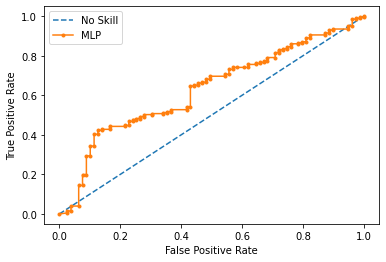

TPR- 0.9113924050632911
FPR- 0.7711442786069652
0.42987593677183705
No Skill: ROC AUC=0.500
MLP: ROC AUC=0.802


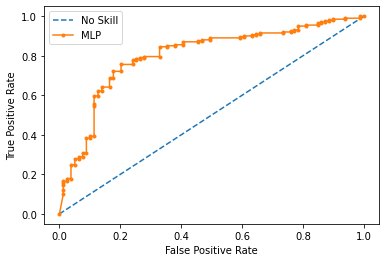

TPR- 0.6455696202531646
FPR- 0.14925373134328357
0.2518420555450595
No Skill: ROC AUC=0.500
MLP: ROC AUC=0.855


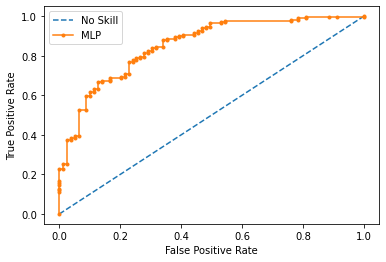

TPR- 0.6582278481012658
FPR- 0.13432835820895522
0.2380502550538447
No Skill: ROC AUC=0.500
MLP: ROC AUC=0.847


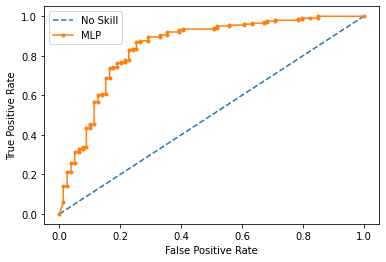

TPR- 0.759493670886076
FPR- 0.16417910447761194
0.20234271679576799
No Skill: ROC AUC=0.500
MLP: ROC AUC=0.520


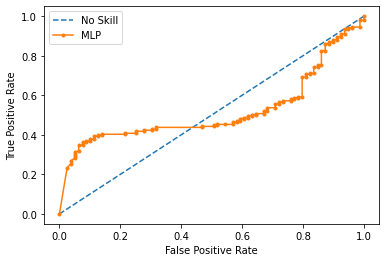

TPR- 0.4050632911392405
FPR- 0.527363184079602
0.5611499464701808


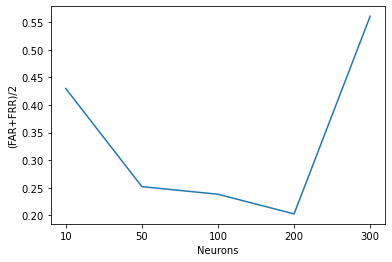

In [770]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(10), random_state=1)
model=clf
model.fit(X_train,Y_train)
# predict probabilities
ns_probs = [0 for _ in range(len(Y_validation))]
lr_probs = model.predict_proba(X_validation)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_validation, ns_probs)
lr_auc = roc_auc_score(Y_validation, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('MLP: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_validation, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_validation, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='MLP')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
from sklearn.metrics import confusion_matrix
Y_pred=model.predict(X_validation)
a=confusion_matrix(Y_validation, Y_pred)
FP = a[1][0]
FN = a[0][1]
TP = a[0][0]
TN = a[1][1]
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
print("TPR-",TPR)
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
print("FPR-",FPR)
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

FAR=FPR
FRR=FNR
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
ten=(FAR+FRR)/2
print(ten)

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(50), random_state=1)
model=clf
model.fit(X_train,Y_train)
# predict probabilities
ns_probs = [0 for _ in range(len(Y_validation))]
lr_probs = model.predict_proba(X_validation)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_validation, ns_probs)
lr_auc = roc_auc_score(Y_validation, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('MLP: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_validation, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_validation, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='MLP')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
from sklearn.metrics import confusion_matrix
Y_pred=model.predict(X_validation)
a=confusion_matrix(Y_validation, Y_pred)
FP = a[1][0]
FN = a[0][1]
TP = a[0][0]
TN = a[1][1]
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
print("TPR-",TPR)
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
print("FPR-",FPR)
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

FAR=FPR
FRR=FNR
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
fifty=(FAR+FRR)/2
print(fifty)

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(100), random_state=1)
model=clf
model.fit(X_train,Y_train)
# predict probabilities
ns_probs = [0 for _ in range(len(Y_validation))]
lr_probs = model.predict_proba(X_validation)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_validation, ns_probs)
lr_auc = roc_auc_score(Y_validation, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('MLP: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_validation, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_validation, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='MLP')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
from sklearn.metrics import confusion_matrix
Y_pred=model.predict(X_validation)
a=confusion_matrix(Y_validation, Y_pred)
FP = a[1][0]
FN = a[0][1]
TP = a[0][0]
TN = a[1][1]
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
print("TPR-",TPR)
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
print("FPR-",FPR)
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

FAR=FPR
FRR=FNR
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
hundred=(FAR+FRR)/2
print(hundred)

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(200), random_state=1)
model=clf
model.fit(X_train,Y_train)
# predict probabilities
ns_probs = [0 for _ in range(len(Y_validation))]
lr_probs = model.predict_proba(X_validation)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_validation, ns_probs)
lr_auc = roc_auc_score(Y_validation, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('MLP: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_validation, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_validation, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='MLP')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
from sklearn.metrics import confusion_matrix
Y_pred=model.predict(X_validation)
a=confusion_matrix(Y_validation, Y_pred)
FP = a[1][0]
FN = a[0][1]
TP = a[0][0]
TN = a[1][1]
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
print("TPR-",TPR)
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
print("FPR-",FPR)
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

FAR=FPR
FRR=FNR
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
two_hundred=(FAR+FRR)/2
print(two_hundred)

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(300), random_state=1)
model=clf
model.fit(X_train,Y_train)
# predict probabilities
ns_probs = [0 for _ in range(len(Y_validation))]
lr_probs = model.predict_proba(X_validation)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_validation, ns_probs)
lr_auc = roc_auc_score(Y_validation, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('MLP: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_validation, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_validation, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='MLP')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
from sklearn.metrics import confusion_matrix
Y_pred=model.predict(X_validation)
a=confusion_matrix(Y_validation, Y_pred)
FP = a[1][0]
FN = a[0][1]
TP = a[0][0]
TN = a[1][1]
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
print("TPR-",TPR)
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
print("FPR-",FPR)
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

FAR=FPR
FRR=FNR
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
three_hundred=(FAR+FRR)/2
print(three_hundred)

Neurons=['10','50','100','200','300']
FAR_FRR_average=[ten,fifty,hundred,two_hundred,three_hundred]

import matplotlib.pyplot as plt
plt.plot(Neurons,FAR_FRR_average)
plt.xlabel('Neurons')
plt.ylabel('(FAR+FRR)/2')
plt.show()

In [771]:
df1 = pd.read_csv('C://Users//user//Desktop//major_project//keystroke-dynamics-datagen-master//Keystroke-Dynamics-Using-LSTMs-master//Keystroke-Dynamics-Using-LSTMs-master/shiva_appended.csv')
df2= pd.read_csv('C://Users//user//Desktop//major_project//keystroke-dynamics-datagen-master//Keystroke-Dynamics-Using-LSTMs-master//Keystroke-Dynamics-Using-LSTMs-master/shiva_fraud_appended.csv')

In [772]:
df1['output']=1
df2['output']=0

In [773]:
df_train=pd.concat([df1, df2], axis=0)

In [774]:
df_train.shape

(1400, 33)

In [775]:
from sklearn.utils import shuffle
df = shuffle(df_train)
df.columns
#df.get_index('')

Index(['Name', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm',
       'n', 'o', 'p', 'Time_from_lastcheckin', 'Distance_from_lastcheckin',
       'Result', 'Place', 'Last_Checkin_time', 'Current_checkin_time',
       'Previous_latitude', 'Previous_longitude', 'Previous_latitude.1',
       'Present_longitude', 'pressure_s', 'pressure_h', 'pressure_i',
       'pressure_v', 'pressure_a', 'output'],
      dtype='object')

In [776]:
df1=df.iloc[:,1:19]
df2=df.iloc[:,27:]
df=pd.concat([df1,df2],axis=1)
array = df.values
X = array[:,0:21]
Y = array[:,-1]
df

,a,b,c,d,e,f,g,h,i,j,...,o,p,Time_from_lastcheckin,Distance_from_lastcheckin,pressure_s,pressure_h,pressure_i,pressure_v,pressure_a,output
153,0.159265,0.212990,0.372255,0.082222,0.255030,0.337252,0.104862,0.246866,0.351728,0.084321,...,1.150783,0.075599,0.041667,13663,632.0,483.0,916.0,455.0,467.5,0
864,0.144395,0.096431,0.240826,0.086603,0.168165,0.254768,0.091416,0.161948,0.253364,0.061920,...,0.638649,0.067595,0.041667,808,928.0,657.0,862.0,942.0,925.0,1
207,0.149134,0.095284,0.244418,0.078049,0.186720,0.264769,0.111879,0.155903,0.267782,0.084427,...,0.607442,0.064604,1.000000,0,928.0,731.0,950.0,948.0,871.0,1
381,0.171424,0.216911,0.388335,0.172012,0.072334,0.244346,0.111991,0.218722,0.330713,0.069852,...,1.008182,0.017812,1.000001,358,752.0,505.0,939.0,918.0,371.0,0
183,0.122496,0.100426,0.222922,0.073836,0.198366,0.272202,0.070866,0.232348,0.303214,0.083832,...,0.593721,0.085902,0.041667,10436,797.0,639.0,281.0,624.0,783.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,0.136071,0.287397,0.423468,0.097197,0.302100,0.399297,0.105986,0.295416,0.401402,0.084641,...,0.642060,0.082480,0.041667,0,268.0,294.0,850.0,390.0,644.0,0
61,0.146435,0.248534,0.394969,0.058282,0.266924,0.325206,0.059108,0.298051,0.357159,0.059178,...,1.059321,0.068405,0.041667,347,357.0,850.0,259.0,676.0,721.0,0
207,0.131268,0.320844,0.452112,0.069089,0.345554,0.414643,0.096782,0.443805,0.540587,0.083908,...,1.426163,0.105318,0.041667,9578,721.0,763.0,882.0,192.0,324.0,0
317,0.111780,0.216668,0.328448,0.063269,0.264106,0.327375,0.058402,0.287265,0.345667,0.051888,...,1.052278,0.115899,0.041667,0,924.0,860.0,775.0,614.0,844.0,0


In [777]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

No Skill: ROC AUC=0.500
MLP: ROC AUC=0.520


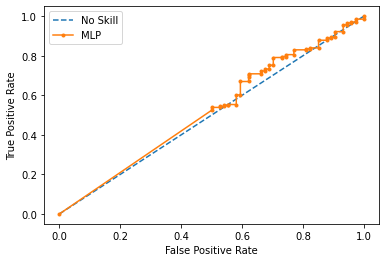

TPR- 1.0
FPR- 1.0
0.5
No Skill: ROC AUC=0.500
MLP: ROC AUC=0.559


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in longlong_scalars


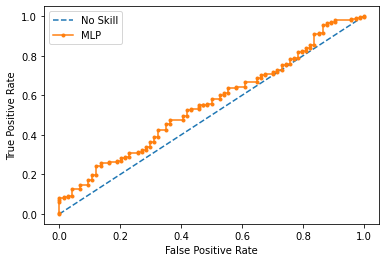

TPR- 0.9594594594594594
FPR- 0.8932038834951457
0.4668722120178431
No Skill: ROC AUC=0.500
MLP: ROC AUC=0.458


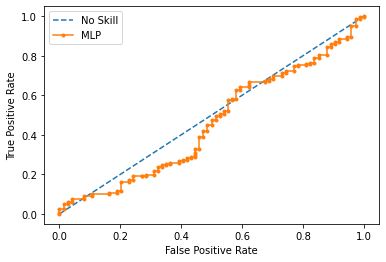

TPR- 1.0
FPR- 0.9902912621359223
0.49514563106796117
No Skill: ROC AUC=0.500
MLP: ROC AUC=0.564


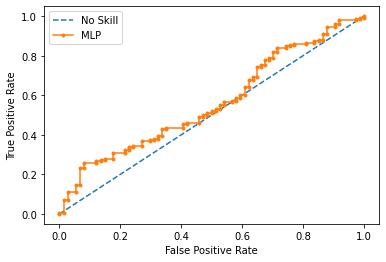

TPR- 1.0
FPR- 1.0
0.5


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:217: RuntimeWarning: invalid value encountered in longlong_scalars


No Skill: ROC AUC=0.500
MLP: ROC AUC=0.685


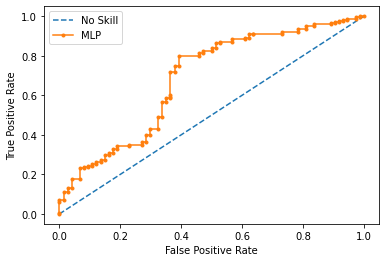

TPR- 0.4864864864864865
FPR- 0.14563106796116504
0.3295722907373393


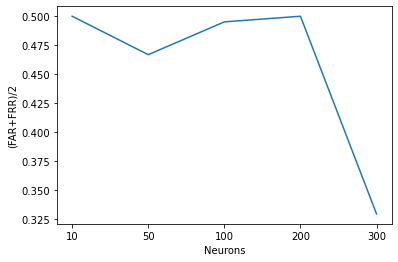

In [778]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(10), random_state=1)
model=clf
model.fit(X_train,Y_train)
# predict probabilities
ns_probs = [0 for _ in range(len(Y_validation))]
lr_probs = model.predict_proba(X_validation)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_validation, ns_probs)
lr_auc = roc_auc_score(Y_validation, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('MLP: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_validation, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_validation, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='MLP')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
from sklearn.metrics import confusion_matrix
Y_pred=model.predict(X_validation)
a=confusion_matrix(Y_validation, Y_pred)
FP = a[1][0]
FN = a[0][1]
TP = a[0][0]
TN = a[1][1]
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
print("TPR-",TPR)
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
print("FPR-",FPR)
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

FAR=FPR
FRR=FNR
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
ten=(FAR+FRR)/2
print(ten)

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(50), random_state=1)
model=clf
model.fit(X_train,Y_train)
# predict probabilities
ns_probs = [0 for _ in range(len(Y_validation))]
lr_probs = model.predict_proba(X_validation)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_validation, ns_probs)
lr_auc = roc_auc_score(Y_validation, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('MLP: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_validation, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_validation, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='MLP')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
from sklearn.metrics import confusion_matrix
Y_pred=model.predict(X_validation)
a=confusion_matrix(Y_validation, Y_pred)
FP = a[1][0]
FN = a[0][1]
TP = a[0][0]
TN = a[1][1]
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
print("TPR-",TPR)
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
print("FPR-",FPR)
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

FAR=FPR
FRR=FNR
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
fifty=(FAR+FRR)/2
print(fifty)

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(100), random_state=1)
model=clf
model.fit(X_train,Y_train)
# predict probabilities
ns_probs = [0 for _ in range(len(Y_validation))]
lr_probs = model.predict_proba(X_validation)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_validation, ns_probs)
lr_auc = roc_auc_score(Y_validation, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('MLP: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_validation, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_validation, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='MLP')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
from sklearn.metrics import confusion_matrix
Y_pred=model.predict(X_validation)
a=confusion_matrix(Y_validation, Y_pred)
FP = a[1][0]
FN = a[0][1]
TP = a[0][0]
TN = a[1][1]
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
print("TPR-",TPR)
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
print("FPR-",FPR)
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

FAR=FPR
FRR=FNR
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
hundred=(FAR+FRR)/2
print(hundred)

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(200), random_state=1)
model=clf
model.fit(X_train,Y_train)
# predict probabilities
ns_probs = [0 for _ in range(len(Y_validation))]
lr_probs = model.predict_proba(X_validation)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_validation, ns_probs)
lr_auc = roc_auc_score(Y_validation, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('MLP: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_validation, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_validation, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='MLP')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
from sklearn.metrics import confusion_matrix
Y_pred=model.predict(X_validation)
a=confusion_matrix(Y_validation, Y_pred)
FP = a[1][0]
FN = a[0][1]
TP = a[0][0]
TN = a[1][1]
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
print("TPR-",TPR)
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
print("FPR-",FPR)
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

FAR=FPR
FRR=FNR
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
two_hundred=(FAR+FRR)/2
print(two_hundred)

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(300), random_state=1)
model=clf
model.fit(X_train,Y_train)
# predict probabilities
ns_probs = [0 for _ in range(len(Y_validation))]
lr_probs = model.predict_proba(X_validation)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_validation, ns_probs)
lr_auc = roc_auc_score(Y_validation, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('MLP: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_validation, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_validation, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='MLP')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
from sklearn.metrics import confusion_matrix
Y_pred=model.predict(X_validation)
a=confusion_matrix(Y_validation, Y_pred)
FP = a[1][0]
FN = a[0][1]
TP = a[0][0]
TN = a[1][1]
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
print("TPR-",TPR)
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
print("FPR-",FPR)
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

FAR=FPR
FRR=FNR
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
three_hundred=(FAR+FRR)/2
print(three_hundred)

Neurons=['10','50','100','200','300']
FAR_FRR_average=[ten,fifty,hundred,two_hundred,three_hundred]

import matplotlib.pyplot as plt
plt.plot(Neurons,FAR_FRR_average)
plt.xlabel('Neurons')
plt.ylabel('(FAR+FRR)/2')
plt.show()